In [4]:
import numpy as np
import networkx as nx
import random
import copy
import matplotlib.pyplot as plt
import math

from scipy.io import mmread
import pickle
from datetime import datetime

from utils import *
from data_loader import *
from utils import plot_results
import pandas as pd

In [5]:


# Read the CSV file, specifying that the first column is the index
df = pd.read_csv('./output/results.csv', index_col=0)

# Display the dataframe
print(df)

          ER  PA  WS  RandW  BIO  CSKP  FB  WIKI   
                                                   
Rand     100   7  10     34    8    10  94       22
Degree   100   4  17     45    9     4  93       26
ErrRate   71   2   7     18    3     3  19       13
DegXErr   71   2   6     18    3     3  32        7
Appx      61   1   5     18    3     5  30       15
Egal      55   1   3     12    1     1   9        2


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read the data
def read_data(file_path):
    df = pd.read_csv(file_path, index_col=0)
    return df

# Function to plot the results
def plot_results8(performance_metrics, dataset_names, method_names, title="Comparison of Iterations for Cover Ratio >= 70%", xlabel="Datasets", ylabel="# modified nodes", savefig="./output/comparison.pdf"):
    # metrics = [[1,2,3], [2,3,4], [3,4,5], [4,5,6]] 
    metrics = performance_metrics
    # Setting a lighter color for 'Greedy' method - 'sky blue'
    colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']

    # Number of datasets
    n_datasets = len(dataset_names)
    # Number of methods
    n_methods = len(method_names)

    # Create a 2D array from the metrics for easy manipulation
    metrics_array = np.array(metrics)

    # Setting the positions and width for the bars
    pos = np.arange(n_datasets)
    bar_width = 0.1

    # Plotting
    plt.figure(figsize=(10, 5))
    # Double the font size for the plot elements
    default_font_size = plt.rcParams['font.size']
    new_font_size = default_font_size * 2 

    for i, color in enumerate(colors[:n_methods]):
        bars = plt.bar(pos + i * bar_width, metrics_array[i, :], bar_width, label=method_names[i], color=color)
        # for bar in bars:
        #     yval = bar.get_height()
        #     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

    # Adding labels and title
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=18)
    plt.xticks(pos + bar_width * (n_methods - 1) / 2, dataset_names, fontsize=20)
    plt.yticks(fontsize=20) 

    # Adding a legend
    plt.legend(fontsize=13)

    # Show the plot
    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig, format='pdf')
        print("Save to ==> ", savefig)

    plt.show()

    


Save to ==>  ./output/exp8_cover90_comparison.pdf


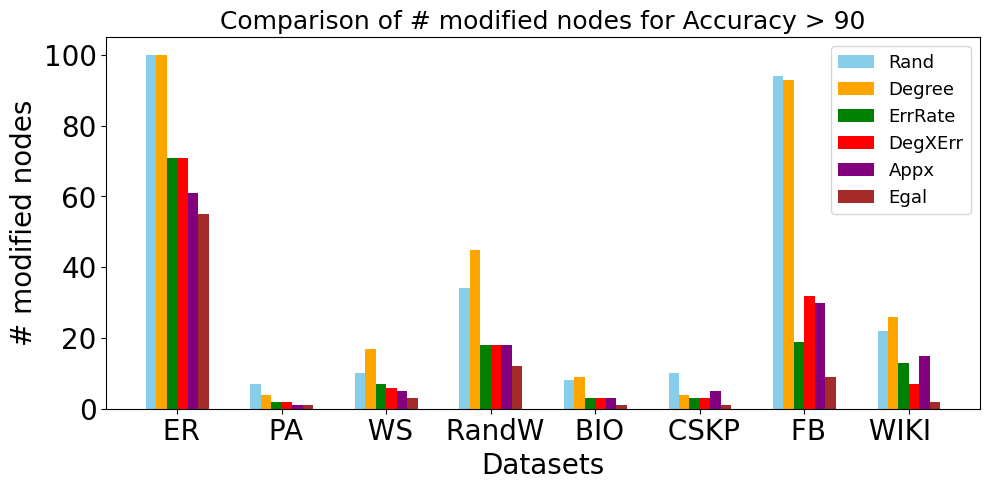

In [30]:

# Main execution
file_path = './output/results.csv'
df = read_data(file_path)

performance_metrics = df.values
dataset_names = df.columns.tolist()
method_names = df.index.tolist()

plot_results8(performance_metrics, dataset_names, method_names, title="Comparison of # modified nodes for Accuracy > 90", savefig="./output/exp8_cover90_comparison.pdf")